In [99]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LinearRegression

In [100]:
covid_df=pd.read_csv('/Users/ttuser/Downloads/COVID/COVID_df.csv')
covid_df.head(10)

,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,specimen_batch_ID,Number_deaths
0,2020-04-17,9979,3386,527,0,96
1,2020-02-08,1,0,0,1,0
2,2020-03-05,63,5,3,2,1
3,2020-04-09,9019,4803,1253,3,386
4,2020-04-03,9389,5523,1688,4,582
5,2020-03-25,7457,4803,1395,5,429
6,2020-03-21,4713,2663,757,6,231
7,2020-03-20,7756,4121,889,7,237
8,2020-03-14,1702,684,217,8,59
9,2020-04-24,8683,2092,230,9,18


In [101]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176094 entries, 0 to 176093
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   specimen_date        176094 non-null  object
 1   Number_tested        176094 non-null  int64 
 2   Number_confirmed     176094 non-null  int64 
 3   Number_hospitalized  176094 non-null  int64 
 4   specimen_batch_ID    176094 non-null  int64 
 5   Number_deaths        176094 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 8.1+ MB


In [102]:
covid_df.describe()

,Number_tested,Number_confirmed,Number_hospitalized,specimen_batch_ID,Number_deaths
count,176094.000000,176094.000000,176094.000000,176094.000000,176094.000000
mean,11144.891990,1428.352249,235.018422,88089.510574,73.963360
std,6411.064875,1368.203914,392.045235,50849.262337,160.129313
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6738.000000,372.000000,38.000000,44077.250000,4.000000
50%,10886.000000,1136.000000,115.000000,88100.500000,21.000000
75%,16448.000000,1960.000000,199.000000,132123.750000,44.000000
max,24727.000000,6852.000000,2016.000000,176147.000000,923.000000


In [103]:
covid_df.dtypes

specimen_date          object
Number_tested           int64
Number_confirmed        int64
Number_hospitalized     int64
specimen_batch_ID       int64
Number_deaths           int64
dtype: object

In [104]:
for column in covid_df.columns:
    print(f"Column{column}has{covid_df[column].isnull().sum()}null values")

Columnspecimen_datehas0null values
ColumnNumber_testedhas0null values
ColumnNumber_confirmedhas0null values
ColumnNumber_hospitalizedhas0null values
Columnspecimen_batch_IDhas0null values
ColumnNumber_deathshas0null values


In [105]:
covid_df.columns.to_list()

['specimen_date',
 'Number_tested',
 'Number_confirmed',
 'Number_hospitalized',
 'specimen_batch_ID',
 'Number_deaths']

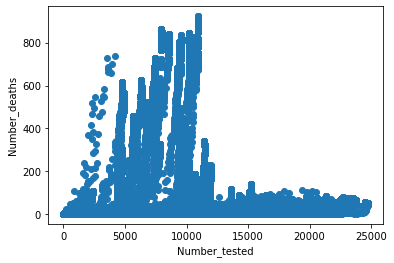

In [106]:
plt.scatter(covid_df.Number_tested, covid_df.Number_deaths)
plt.xlabel('Number_tested')
plt.ylabel('Number_deaths')
plt.show()

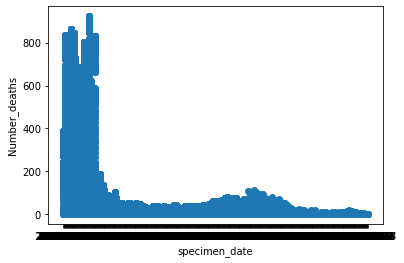

In [107]:
plt.scatter(covid_df.specimen_date, covid_df.Number_deaths)
plt.xlabel('specimen_date')
plt.ylabel('Number_deaths')
plt.show()

In [108]:
X = covid_df.Number_hospitalized.values.reshape(-1, 1)

In [109]:
y = covid_df.Number_deaths.values.reshape(-1, 1)

In [110]:
X.shape

(176094, 1)

In [111]:
y.shape

(176094, 1)

In [112]:
X[:5]

array([[ 527],
       [   0],
       [   3],
       [1253],
       [1688]])

In [113]:
y[:5]

array([[ 96],
       [  0],
       [  1],
       [386],
       [582]])

In [114]:
model = LinearRegression()

In [115]:
model.fit(X, y)

LinearRegression()

In [116]:
y_pred = model.predict(X)
print(y_pred.shape)

(176094, 1)


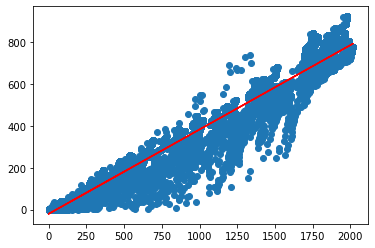

In [117]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [118]:
print(model.coef_)
print(model.intercept_)

[[0.40316768]]
[-20.78847218]


In [119]:
##Logistic Regression 
covid_df.head(10)

,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,specimen_batch_ID,Number_deaths
0,2020-04-17,9979,3386,527,0,96
1,2020-02-08,1,0,0,1,0
2,2020-03-05,63,5,3,2,1
3,2020-04-09,9019,4803,1253,3,386
4,2020-04-03,9389,5523,1688,4,582
5,2020-03-25,7457,4803,1395,5,429
6,2020-03-21,4713,2663,757,6,231
7,2020-03-20,7756,4121,889,7,237
8,2020-03-14,1702,684,217,8,59
9,2020-04-24,8683,2092,230,9,18


In [120]:
covid_df["risk_of_death"] = covid_df["Number_deaths"] / covid_df["Number_hospitalized"]

In [121]:
covid_df.head()

,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,specimen_batch_ID,Number_deaths,risk_of_death
0,2020-04-17,9979,3386,527,0,96,0.182163
1,2020-02-08,1,0,0,1,0,NaN
2,2020-03-05,63,5,3,2,1,0.333333
3,2020-04-09,9019,4803,1253,3,386,0.308061
4,2020-04-03,9389,5523,1688,4,582,0.344787


In [122]:
new_covid_df=covid_df.dropna()

In [123]:
new_covid_df.head()

,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,specimen_batch_ID,Number_deaths,risk_of_death
0,2020-04-17,9979,3386,527,0,96,0.182163
2,2020-03-05,63,5,3,2,1,0.333333
3,2020-04-09,9019,4803,1253,3,386,0.308061
4,2020-04-03,9389,5523,1688,4,582,0.344787
5,2020-03-25,7457,4803,1395,5,429,0.307527


In [124]:
new_covid_df['death_chance']=new_covid_df['risk_of_death'].round(1)*100
new_covid_df.head(10)

/Users/ttuser/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,specimen_batch_ID,Number_deaths,risk_of_death,death_chance
0,2020-04-17,9979,3386,527,0,96,0.182163,20.0
2,2020-03-05,63,5,3,2,1,0.333333,30.0
3,2020-04-09,9019,4803,1253,3,386,0.308061,30.0
4,2020-04-03,9389,5523,1688,4,582,0.344787,30.0
5,2020-03-25,7457,4803,1395,5,429,0.307527,30.0
6,2020-03-21,4713,2663,757,6,231,0.305152,30.0
7,2020-03-20,7756,4121,889,7,237,0.266592,30.0
8,2020-03-14,1702,684,217,8,59,0.271889,30.0
9,2020-04-24,8683,2092,230,9,18,0.078261,10.0
10,2020-03-08,109,27,15,10,4,0.266667,30.0


In [125]:
new_covid_df2=new_covid_df

In [126]:
output_file_path = "/Users/ttuser/Downloads/COVID/COVID_df.csv"
new_covid_df2.to_csv(output_file_path, index=False)

In [127]:
death_chance_df=pd.read_csv("/Users/ttuser/Downloads/COVID/COVID_df.csv")
death_chance_df.head(10)

,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,specimen_batch_ID,Number_deaths,risk_of_death,death_chance
0,2020-04-17,9979,3386,527,0,96,0.182163,20.0
1,2020-03-05,63,5,3,2,1,0.333333,30.0
2,2020-04-09,9019,4803,1253,3,386,0.308061,30.0
3,2020-04-03,9389,5523,1688,4,582,0.344787,30.0
4,2020-03-25,7457,4803,1395,5,429,0.307527,30.0
5,2020-03-21,4713,2663,757,6,231,0.305152,30.0
6,2020-03-20,7756,4121,889,7,237,0.266592,30.0
7,2020-03-14,1702,684,217,8,59,0.271889,30.0
8,2020-04-24,8683,2092,230,9,18,0.078261,10.0
9,2020-03-08,109,27,15,10,4,0.266667,30.0


In [128]:
death_chance_df['death_probability']= death_chance=pd.cut(death_chance_df['death_chance'], 
                               bins=[0, 30, 100], 
                               labels=['0', '1'])

In [129]:
death_chance_df.head(10)

,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,specimen_batch_ID,Number_deaths,risk_of_death,death_chance,death_probability
0,2020-04-17,9979,3386,527,0,96,0.182163,20.0,0
1,2020-03-05,63,5,3,2,1,0.333333,30.0,0
2,2020-04-09,9019,4803,1253,3,386,0.308061,30.0,0
3,2020-04-03,9389,5523,1688,4,582,0.344787,30.0,0
4,2020-03-25,7457,4803,1395,5,429,0.307527,30.0,0
5,2020-03-21,4713,2663,757,6,231,0.305152,30.0,0
6,2020-03-20,7756,4121,889,7,237,0.266592,30.0,0
7,2020-03-14,1702,684,217,8,59,0.271889,30.0,0
8,2020-04-24,8683,2092,230,9,18,0.078261,10.0,0
9,2020-03-08,109,27,15,10,4,0.266667,30.0,0


In [130]:
new_death_chance_df=death_chance_df.dropna()

In [131]:
new_death_chance_df = death_chance_df.apply (pd.to_numeric, errors='coerce')

print (new_death_chance_df)

        specimen_date  Number_tested  Number_confirmed  Number_hospitalized  \
0                 NaN           9979              3386                  527   
1                 NaN             63                 5                    3   
2                 NaN           9019              4803                 1253   
3                 NaN           9389              5523                 1688   
4                 NaN           7457              4803                 1395   
...               ...            ...               ...                  ...   
162771            NaN          21551              2483                  163   
162772            NaN          13961              1678                  166   
162773            NaN            401                89                   36   
162774            NaN          14573               503                   38   
162775            NaN          18765              1648                  147   

        specimen_batch_ID  Number_deaths  risk_of_d

In [132]:
output_file_path = "/Users/ttuser/Downloads/COVID/COVID_df.csv"
death_chance_df.to_csv(output_file_path, index=False)

In [133]:
death_probability_df=pd.read_csv("/Users/ttuser/Downloads/COVID/COVID_df.csv")
death_probability_df.head(10)

,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,specimen_batch_ID,Number_deaths,risk_of_death,death_chance,death_probability
0,2020-04-17,9979,3386,527,0,96,0.182163,20.0,0.0
1,2020-03-05,63,5,3,2,1,0.333333,30.0,0.0
2,2020-04-09,9019,4803,1253,3,386,0.308061,30.0,0.0
3,2020-04-03,9389,5523,1688,4,582,0.344787,30.0,0.0
4,2020-03-25,7457,4803,1395,5,429,0.307527,30.0,0.0
5,2020-03-21,4713,2663,757,6,231,0.305152,30.0,0.0
6,2020-03-20,7756,4121,889,7,237,0.266592,30.0,0.0
7,2020-03-14,1702,684,217,8,59,0.271889,30.0,0.0
8,2020-04-24,8683,2092,230,9,18,0.078261,10.0,0.0
9,2020-03-08,109,27,15,10,4,0.266667,30.0,0.0


In [134]:
#Separate the Features (X) from the Target (y)

In [135]:
y = death_probability_df["death_probability"]
X = death_probability_df.drop(columns="death_probability")

In [136]:
#Split  data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#Create a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

In [ ]:
#Fit (train) or model using the training data
classifier.fit(X_train, y_train)

In [ ]:
#Make predictions
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

In [ ]:
#Make predictions
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

In [ ]:
# Visualizing all classes
plt.scatter(X[:, 0], X[:, 1],X[:, 1] c=y)